<a href="https://colab.research.google.com/github/Jesulolufemi/House-Pricing-Prediction/blob/main/House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Prediction**

**Problem Statement:**
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

* To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

* To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

* To know the accuracy of the model, i.e. how well these variables can predict house prices.

**Data**

Use housing dataset.

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
# Convert the 'date' column to a datetime object
df.date = pd.to_datetime(df.date)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Add the 'month' column
df['month'] = df.date.dt.month

In [ ]:
# Add the 'year' column
df['year'] = df.date.dt.year

In [ ]:
# Add the 'day' column
df['day'] = df.date.dt.day

In [ ]:
df['weekday'] = df.date.dt.weekday

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day,weekday
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,10,2014,13,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,12,2014,9,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2,2015,25,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,12,2014,9,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2,2015,18,2


<ipython-input-48-0a0442148f10>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt=".2f",annot=True)


<Axes: >

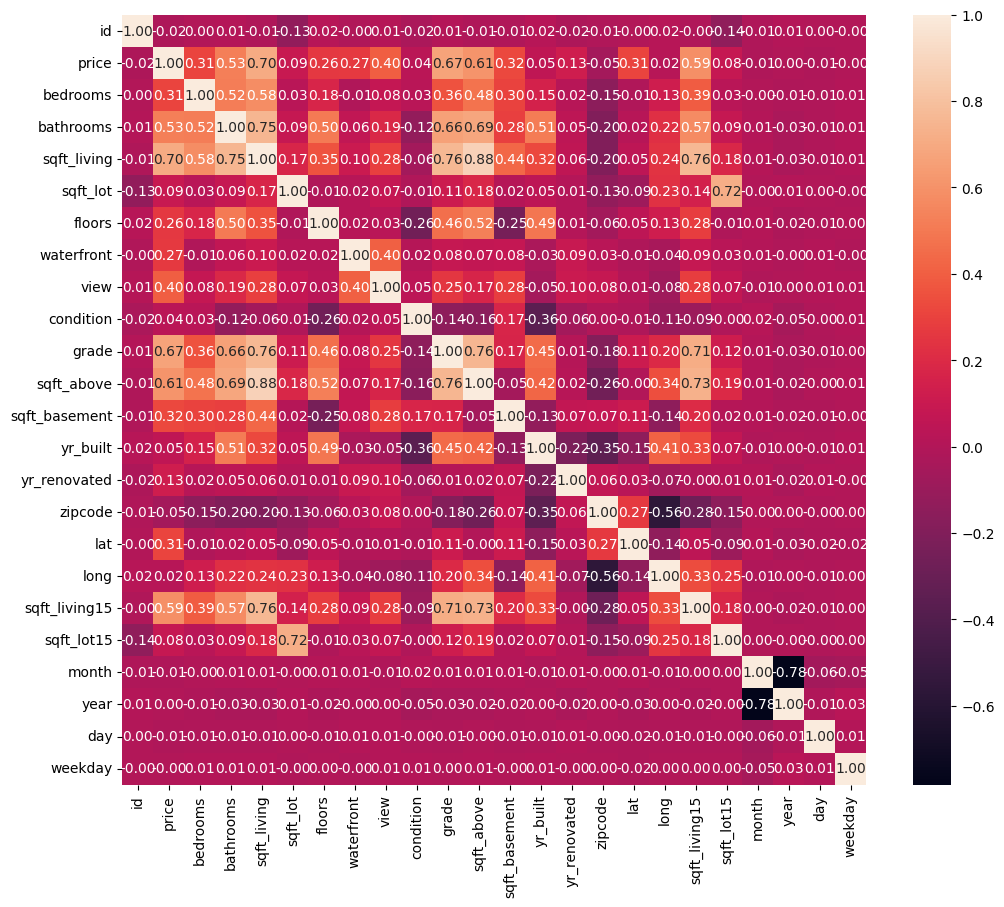

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),fmt=".2f",annot=True)

<Axes: xlabel='price', ylabel='Count'>

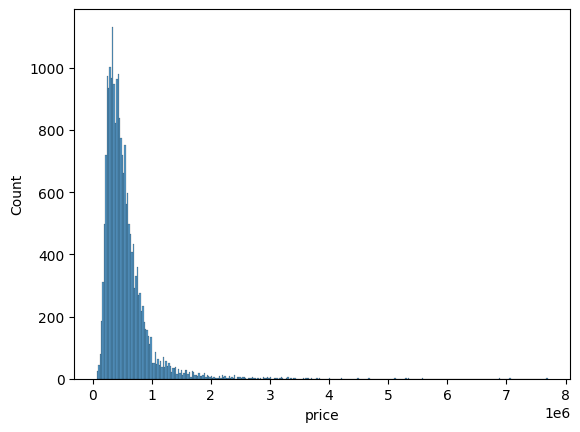

In [ ]:
sns.histplot(df.price)

<Axes: xlabel='bedrooms', ylabel='price'>

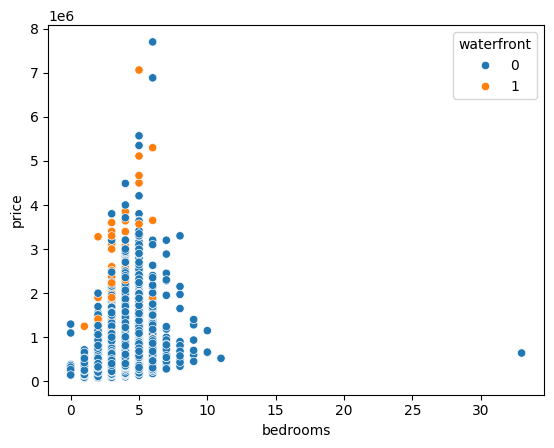

In [ ]:
# Create a scatter plot using seaborn library
# The x-axis represents the number of bedrooms (bedrooms)
# The y-axis represents the price of the houses (price)
# The hue parameter is used to color the points based on the presence of a waterfront (waterfront)
sns.scatterplot(x = 'bedrooms',y='price',data = df,hue = 'waterfront')

Showing the dependency between bedrooms and the price, in the catogory of waterfront. 0 (blue) means houses with no waterfront.

INSIGHTS

The houses with waterfronts has higher prices.
Most houses with many bedromms don't have waterfronts
There is an outlier - More than 30 bedrooms. It looks like an error
The increasing number of bedrooms does not neccessary affect the price

In [ ]:
#identigying the outlier
df[df.bedrooms > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day,weekday
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,0,98103,47.6878,-122.331,1330,4700,6,2014,25,2


In [ ]:
df.drop(15870,inplace= True)

<Axes: xlabel='bedrooms', ylabel='price'>

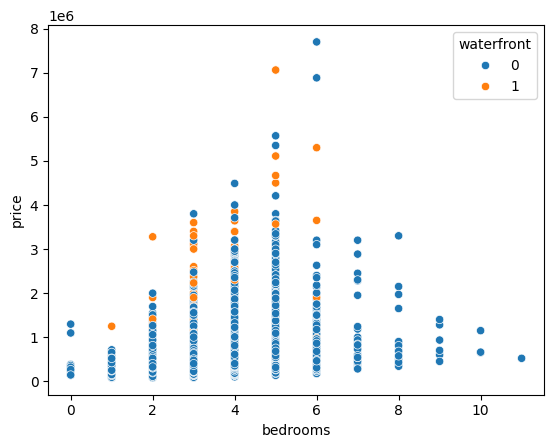

In [ ]:
sns.scatterplot(x = 'bedrooms',y='price',data = df,hue = 'waterfront')

<Axes: xlabel='sqft_living', ylabel='price'>

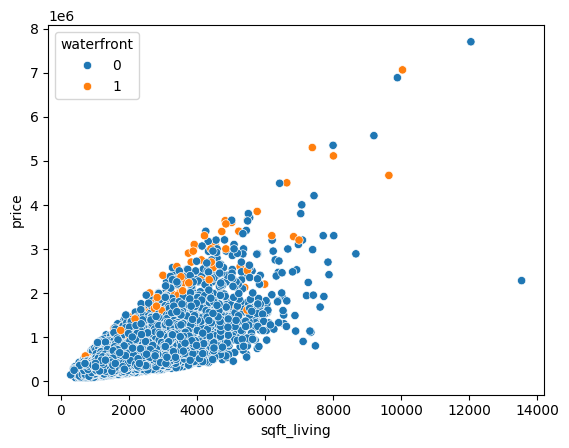

In [ ]:
sns.scatterplot(x = 'sqft_living',y='price',data = df,hue = 'waterfront')

**Observation**
1. There is a correlation between the sqft living and the price.
2. The higher it goes, the higher the price
3. There is an outlier

In [ ]:
#identifying the outliers
df[df.sqft_living > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day,weekday
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,10,2014,13,0
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,0,98053,47.6675,-121.986,4850,217800,5,2014,5,0


Dropping the outlier with lower price

In [ ]:
df.drop(12777,inplace=True)

In [ ]:
df.dropna(inplace=True)

<Axes: xlabel='sqft_living', ylabel='price'>

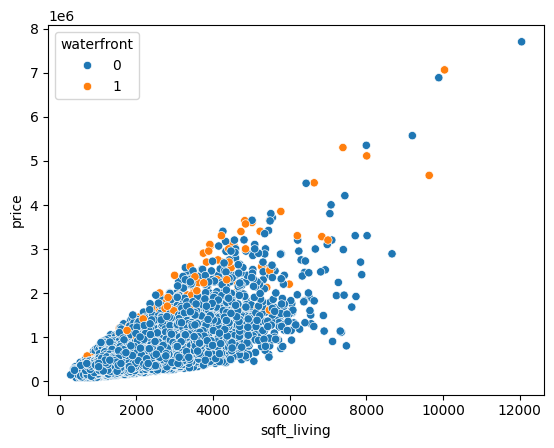

In [ ]:
sns.scatterplot(x = 'sqft_living',y='price',data = df,hue = 'waterfront')

# BUILDING MODEL

In [ ]:
x = df.drop(columns =['id','price','date'])

In [ ]:
x.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
day              0
weekday          0
dtype: int64

In [ ]:
x.dropna()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day,weekday
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,...,0,98178,47.5112,-122.257,1340,5650,10,2014,13,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,...,1991,98125,47.7210,-122.319,1690,7639,12,2014,9,1
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,...,0,98028,47.7379,-122.233,2720,8062,2,2015,25,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,...,0,98136,47.5208,-122.393,1360,5000,12,2014,9,1
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,...,0,98074,47.6168,-122.045,1800,7503,2,2015,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,...,0,98103,47.6993,-122.346,1530,1509,5,2014,21,2
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,...,0,98146,47.5107,-122.362,1830,7200,2,2015,23,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,...,0,98144,47.5944,-122.299,1020,2007,6,2014,23,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,...,0,98027,47.5345,-122.069,1410,1287,1,2015,16,4


In [ ]:
y = df.price

In [ ]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
# The first argument is the data (x) and the second argument is the target variable (y)
# The test_size parameter is used to specify the size of the test set (0.3 means 30% of the data will be used for testing)
# The random_state parameter is used to specify the seed for the random number generator, which ensures reproducibility of the results
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [ ]:
#importing linear regression
lr = LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
#to check for accuracy between the x_train and y_train
model.score(x_train,y_train)

0.7007251729727026

In [ ]:
#to check for accuracy between the x_test and y_test
model.score(x_test,y_test)

0.7031493981266415

This model has a good fit since the training data and the test data have the similar accuracy

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#to check for accuracy using Polynomial Features
poly = PolynomialFeatures(2)

In [ ]:
x_trans = poly.fit_transform(x)

In [ ]:
#use the transfrom data to run linear regression model
x_train,x_test,y_train,y_test = train_test_split(x_trans,y,test_size = 0.3,random_state=42)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.8317427839482436

In [ ]:
model.score(x_test,y_test)

0.8255171354833829

In [ ]:
import numpy as np

In [ ]:
#Compute the correlation matrix
corr_matrix = np.corrcoef(x.T)

In [ ]:
#Find the indices of the upper triangle of the correlation matrix, excluding the diagonal:
upper = np.triu_indices(corr_matrix.shape[0], k=1)

In [ ]:
to_drop = []
for i, j in zip(upper[0], upper[1]):
    if corr_matrix[i, j] > 0.9:  # set your threshold here
        to_drop.append([i, j])

In [ ]:
high_corr_cols = []
for i, j in to_drop:
    high_corr_cols.append(x.columns[i])

X_high_corr = x.drop(high_corr_cols, axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_high_corr, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()